In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")

In [3]:
data.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [4]:
data.tail()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy
249,1.0,0.0,0.5,0.5,1.0,1.0,non-bankruptcy


In [5]:
data.shape

(250, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [8]:
 data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

# Bar plots and Correlation analysis

In [9]:
data.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class'],
      dtype='object')

In [10]:
features = ['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class']

In [11]:
list(enumerate(features))

[(0, 'industrial_risk'),
 (1, 'management_risk'),
 (2, 'financial_flexibility'),
 (3, 'credibility'),
 (4, 'competitiveness'),
 (5, 'operating_risk'),
 (6, 'class')]

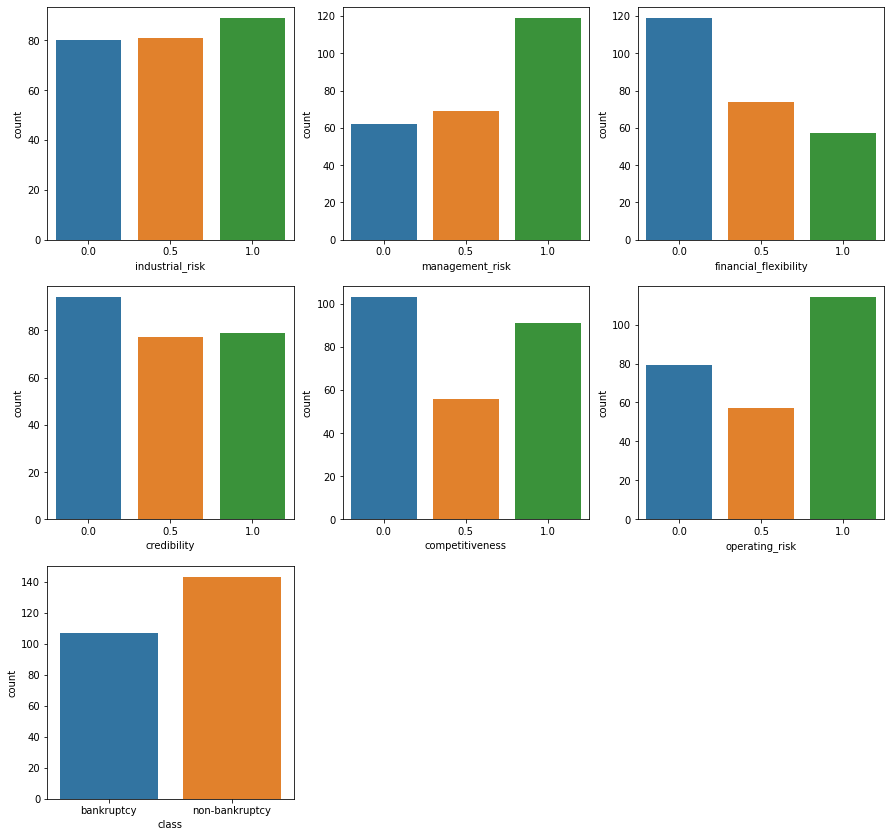

In [15]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (15,30))
for i in enumerate(features):
    plt.subplot(6,3,i[0]+1)
    sns.countplot(i[1],data=data)
    

In [16]:
#Correlation

correlation=data.corr()
correlation

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000


<AxesSubplot:>

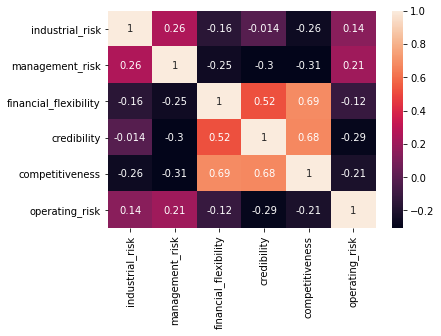

In [17]:
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

# Transformations

In [18]:
data['class'].value_counts()

non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64

In [19]:
data['class'] = data['class'].astype("category")

In [20]:
# Encoding the categorical columns by using label encoder

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [22]:
data['class'] = label_encoder.fit_transform(data['class'])


In [23]:
data['class']

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class, Length: 250, dtype: int32

In [24]:
# let consider bankruptcy=0 and non-bankrupcy=1

In [25]:
data['class'].value_counts()

1    143
0    107
Name: class, dtype: int64

# Data Rescaling

In [26]:
# Rescale data (between x and y)
import pandas as pd
data=pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
array = data.values
# separate array into input and output components
X = array[:,1:6]
Y = array[:,6]

scaler = MinMaxScaler()
rescaledX = scaler.fit_transform(X)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[1.  0.  0.  0.  0.5]
 [1.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.5 0.  1. ]
 [1.  0.  0.  0.  1. ]]


# Data Standardization

In [27]:
# Standardize data (0 mean, 1 stdev)
import pandas as pd
data=pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
from sklearn.preprocessing import StandardScaler
data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
array = data.values
# separate array into input and output components
X = array[:,0:6]
Y = array[:,6]

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-0.044  0.942 -0.938 -1.133 -1.082 -0.161]
 [-1.261  0.942 -0.938 -1.133 -1.082  0.991]
 [ 1.174 -1.498 -0.938 -1.133 -1.082  0.991]
 [-0.044 -1.498 -0.938  0.072 -1.082  0.991]
 [ 1.174  0.942 -0.938 -1.133 -1.082  0.991]]


# Feature Engineering- Method1

In [28]:
# Feature Extraction with RFE
import pandas as pd
data=pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
array = data.values
X = array[:,0:6]
Y = array[:,6]
# feature extraction
model = LogisticRegression(max_iter=200)


rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, Y)

fit.n_features_
fit.support_
fit.ranking_


array([2, 1, 1, 1, 1, 3])

# Feature Engineering- Method2

In [29]:
# Feature Importance with Extra Trees Classifier
import pandas as pd
data=pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
from sklearn.ensemble import ExtraTreesClassifier
data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

array = data.values
X = array[:,0:6]
Y = array[:,6]

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)

print(model.feature_importances_)

[0.023 0.036 0.284 0.248 0.387 0.022]


# Model Validation Methods

In [30]:
# Evaluate using a train test split method
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data=pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
# Evaluate using a train test split method
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
data=pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
array = data.values
X = array[:,0:6]
Y = array[:,6]

test_size = 0.33
seed = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)


result = model.score(X_test, Y_test)

result*100.0
array = data.values
X = array[:,0:6]
Y = array[:,6]

test_size = 0.33
seed = 5
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)


result = model.score(X_test, Y_test)

result*100.0

100.0

In [31]:
# Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# Evaluate using Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
array = data.values
X = array[:,0:6]
Y = array[:,6]

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=kfold)

#Print results

results.mean()*100.0
results.std()*100.0
results.mean()*100.0
array = data.values
X = array[:,0:6]
Y = array[:,6]

num_folds = 10
seed = 7

kfold = KFold(n_splits=num_folds)
model = LogisticRegression(max_iter=500)

results = cross_val_score(model, X, Y, cv=kfold)

#Print results

results.mean()*100.0
results.std()*100.0
results.mean()*100.0

99.60000000000001

# Accuracy method

In [32]:
# Cross Validation Classification Accuracy
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
data=pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
# Cross Validation Classification Accuracy
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
data=pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
array = data.values
X = array[:,0:6]
Y = array[:,6]

kfold = KFold(n_splits=10)
model = LogisticRegression(max_iter=500)

scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)


results.mean()
results.std()
array = data.values
X = array[:,0:6]
Y = array[:,6]

kfold = KFold(n_splits=10)
model = LogisticRegression(max_iter=500)

scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)


results.mean()
results.std()

0.012000000000000009

In [33]:
results.mean()*100

99.60000000000001

# Model building

In [34]:
# CART Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
data=pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

array = data.values
X = array[:,0:6]
Y = array[:,6]

kfold = KFold(n_splits=10)

model = DecisionTreeClassifier(criterion='gini')

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

model = DecisionTreeClassifier()
dt=model.fit(X,Y)

0.9879999999999999


In [35]:
# Gaussian Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.976


In [36]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=17)

results = cross_val_score(model, X, Y, cv=kfold)

print(results.mean())


0.9800000000000001


In [37]:
from sklearn.svm import SVC

kfold = KFold(n_splits=10)

model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.9960000000000001


In [38]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

num_trees = 10

kfold = KFold(n_splits=10)
model = AdaBoostClassifier(n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.992


In [39]:
# Bagged Decision Trees for Classification

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.992


In [40]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

X = array[:,0:6]
Y = array[:,6]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.9960000000000001


In [41]:
# Voting Ensemble for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.9960000000000001


# Compare the algorithms

In [42]:
# Compare Algorithms
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
data = pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
array = data.values
X = array[:,0:6]
Y = array[:,6]


# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression(max_iter=400)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

LR: 0.996000 (0.012000)


# Comparing Model using accuracy,precision,recall and f1 scores

In [43]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import recall_score, precision_score, f1_score
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
x=data.iloc[:,0:6]
y=data.iloc[:,6]

In [44]:
names = ["Nearest Neighbors","Logistic Regression", "SVM",
         "Decision Tree", "Random Forest","GaussianNB"]

In [45]:
classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    ]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,
                                                    random_state=1)

In [47]:
model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0

for name, clf in zip(names, classifiers):
    clf.fit(x_train,y_train)
    df.loc[index,'Classifiers'] = name
    df.loc[index,'Train Accuracy'] = clf.score(x_train,y_train)
    df.loc[index,'Test Accuracy'] = clf.score(x_test,y_test)
    df.loc[index,'Precision'] = precision_score(y_test,clf.predict(x_test))
    df.loc[index,'Recall'] = recall_score(y_test,clf.predict(x_test))
    df.loc[index,'F1 Score'] = f1_score(y_test,clf.predict(x_test))
    index+=1

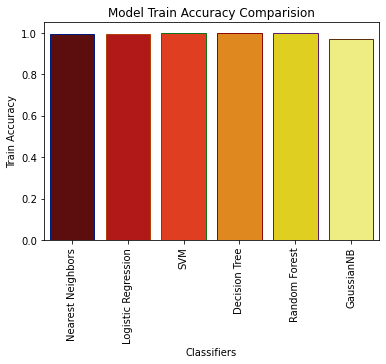

In [48]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Train Accuracy', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Train Accuracy Comparision')
plt.show()

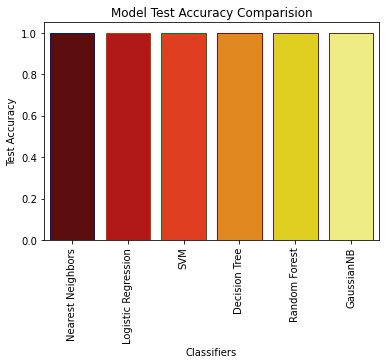

In [49]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Test Accuracy', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Test Accuracy Comparision')
plt.show()

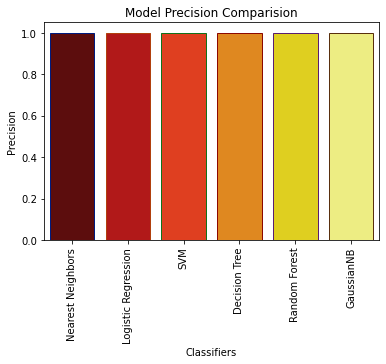

In [50]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Precision', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Precision Comparision')
plt.show()


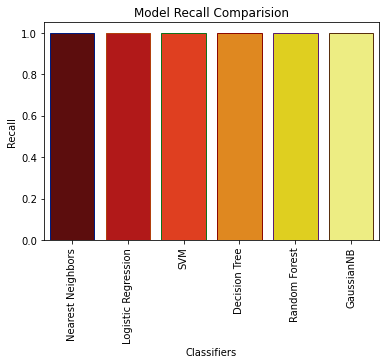

In [51]:
import seaborn as sns
sns.barplot(x='Classifiers',y='Recall', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model Recall Comparision')
plt.show()


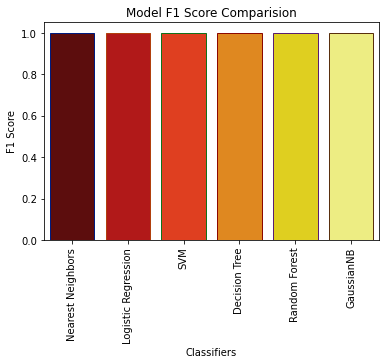

In [52]:
# import seaborn as sns
sns.barplot(x='Classifiers',y='F1 Score', data=df, palette='hot',
            edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Model F1 Score Comparision')
plt.show()

# ML Pipelines

In [53]:
# Create a pipeline that standardizes the data then creates a model
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# load data
data = pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
array = data.values
X = array[:,0:6]
Y = array[:,6]


# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('log', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9960000000000001


In [54]:
# Create a pipeline that extracts features from the data then creates a model
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
# load data
data = pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")
data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
array = data.values
X = array[:,0:6]
Y = array[:,6]

# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(max_iter=300)))
model = Pipeline(estimators)
# evaluate pipeline
kfold = KFold(n_splits=10)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.9960000000000001


In [55]:
# Save Model Using Pickle and load and predict
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
data = pd.read_csv("C:/Users/Win/Desktop/deployment/bank.csv")

data['class'] = data['class'].astype("category")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])
array = data.values
X = array[:,0:6]
Y = array[:,6]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# Fit the model on 33%
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)

# save the model to disk
data = 'finalized_model.sav'
dump(model, open('data', 'wb'))

# some time later...

# load the model from disk
loaded_model = load(open('data', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

1.0


In [56]:
y_pred = model.predict(X_train)
y_pred

array([0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.])

In [57]:
y_pred_test=model.predict(X_test)
y_pred_test

array([1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.])

In [58]:
pd.crosstab(y_pred,Y_train)

col_0,0.0,1.0
row_0,,
0.0,64,0
1.0,1,102


In [59]:
pd.crosstab(y_pred_test,Y_test)

col_0,0.0,1.0
row_0,,
0.0,42,0
1.0,0,41
